In [1]:
'''

2. Car Price Prediction using Polynomial Regression
Dataset: https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv
Task: Predict car prices based on horsepower and other features using Polynomial
Regression.

'''

'\n\n2. Car Price Prediction using Polynomial Regression\nDataset: https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv\nTask: Predict car prices based on horsepower and other features using Polynomial\nRegression.\n\n'

In [2]:
import pandas as pd

C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('Cars93_miss.csv')

In [4]:
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,NaN,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,NaN,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30.0,NaN,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25.0,NaN,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21.0,28.0,Driver only,Rear,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        89 non-null     object 
 1   Model               92 non-null     object 
 2   Type                90 non-null     object 
 3   Min.Price           86 non-null     float64
 4   Price               91 non-null     float64
 5   Max.Price           88 non-null     float64
 6   MPG.city            84 non-null     float64
 7   MPG.highway         91 non-null     float64
 8   AirBags             55 non-null     object 
 9   DriveTrain          86 non-null     object 
 10  Cylinders           88 non-null     object 
 11  EngineSize          91 non-null     float64
 12  Horsepower          86 non-null     float64
 13  RPM                 90 non-null     float64
 14  Rev.per.mile        87 non-null     float64
 15  Man.trans.avail     88 non-null     object 
 16  Fuel.tank.

In [6]:
df.isnull().sum()

Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags               38
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64

In [7]:
df['MPG.city'].values

array([25., 18., 20., 19., 22., 22., 19., 16., 19., 16., 16., 25., 25.,
       19., nan, 18., 15., 17., 17., 20., 23., 20., 29., 23., 22., 17.,
       21., nan, 29., 20., 31., 23., 22., 22., nan, 15., 21., 18., 46.,
       30., 24., 42., 24., 29., nan, 26., 20., 17., 18., 18., 17., 18.,
       29., 28., 26., 18., 17., nan, 19., 23., 19., 29., 18., 29., 24.,
       17., 21., 24., 23., 18., nan, nan, 31., nan, 19., 19., 19., 20.,
       nan, 33., 25., 23., 39., 32., 25., 22., 18., 25., 17., 21., 18.,
       21., 20.])

In [8]:
df1 = df.drop(['Max.Price','Min.Price'],axis=1)

In [9]:
df1

,Manufacturer,Model,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,15.9,25.0,31.0,NaN,Front,4,1.8,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,33.9,18.0,25.0,Driver & Passenger,Front,6,3.2,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,29.1,20.0,26.0,Driver only,Front,6,2.8,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,37.7,19.0,26.0,Driver & Passenger,NaN,6,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,30.0,22.0,30.0,NaN,Rear,4,3.5,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,19.7,17.0,21.0,NaN,Front,5,2.5,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,20.0,21.0,30.0,NaN,Front,4,2.0,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,23.3,18.0,25.0,NaN,Front,6,2.8,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,22.7,21.0,28.0,Driver only,Rear,NaN,2.3,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


In [10]:
df1['Make'].values

array(['Acura Integra', 'Acura Legend', 'Audi 90', 'Audi 100', 'BMW 535i',
       'Buick Century', 'Buick LeSabre', 'Buick Roadmaster',
       'Buick Riviera', 'Cadillac DeVille', 'Cadillac Seville',
       'Chevrolet Cavalier', 'Chevrolet Corsica', 'Chevrolet Camaro',
       'Chevrolet Lumina', 'Chevrolet Lumina_APV', 'Chevrolet Astro',
       'Chevrolet Caprice', 'Chevrolet Corvette', 'Chrylser Concorde',
       'Chrysler LeBaron', 'Chrysler Imperial', 'Dodge Colt',
       'Dodge Shadow', 'Dodge Spirit', 'Dodge Caravan', 'Dodge Dynasty',
       'Dodge Stealth', 'Eagle Summit', 'Eagle Vision', 'Ford Festiva',
       'Ford Escort', nan, 'Ford Mustang', 'Ford Probe', 'Ford Aerostar',
       'Ford Taurus', 'Ford Crown_Victoria', 'Geo Metro', 'Geo Storm',
       'Honda Prelude', 'Honda Civic', 'Honda Accord', 'Hyundai Excel',
       'Hyundai Elantra', nan, 'Hyundai Sonata', 'Infiniti Q45',
       'Lexus ES300', 'Lexus SC300', 'Lincoln Continental',
       'Lincoln Town_Car', 'Mazda 323', 

In [11]:
df1['Make'] = df1['Make'].fillna(df1['Manufacturer'] + df1['Model'])

In [12]:
df1

,Manufacturer,Model,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,15.9,25.0,31.0,NaN,Front,4,1.8,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,33.9,18.0,25.0,Driver & Passenger,Front,6,3.2,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,29.1,20.0,26.0,Driver only,Front,6,2.8,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,37.7,19.0,26.0,Driver & Passenger,NaN,6,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,30.0,22.0,30.0,NaN,Rear,4,3.5,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,19.7,17.0,21.0,NaN,Front,5,2.5,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,20.0,21.0,30.0,NaN,Front,4,2.0,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,23.3,18.0,25.0,NaN,Front,6,2.8,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,22.7,21.0,28.0,Driver only,Rear,NaN,2.3,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


In [13]:

for i in range(df1.shape[0]):
    x = df1['Make'][i].split(' ')
    df1['Manufacturer'] = df1['Manufacturer'].fillna(x[0])



In [14]:
df1.isnull().sum()

Manufacturer           0
Model                  1
Type                   3
Price                  2
MPG.city               9
MPG.highway            2
AirBags               38
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   0
dtype: int64

In [15]:
df2 = df1.drop(['Make','Model'],axis=1)

In [16]:
df2

,Manufacturer,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Small,15.9,25.0,31.0,NaN,Front,4,1.8,140.0,...,13.2,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA
1,Acura,Midsize,33.9,18.0,25.0,Driver & Passenger,Front,6,3.2,200.0,...,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA
2,Audi,Compact,29.1,20.0,26.0,Driver only,Front,6,2.8,172.0,...,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA
3,Audi,Midsize,37.7,19.0,26.0,Driver & Passenger,NaN,6,NaN,172.0,...,21.1,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA
4,BMW,Midsize,30.0,22.0,30.0,NaN,Rear,4,3.5,208.0,...,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Van,19.7,17.0,21.0,NaN,Front,5,2.5,109.0,...,21.1,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN
89,Volkswagen,Compact,20.0,21.0,30.0,NaN,Front,4,2.0,134.0,...,18.5,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA
90,Volkswagen,Sporty,23.3,18.0,25.0,NaN,Front,6,2.8,178.0,...,18.5,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA
91,Volvo,Compact,22.7,21.0,28.0,Driver only,Rear,NaN,2.3,114.0,...,15.8,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA


In [17]:
df2['Type'].isnull().sum()

3

<Axes: xlabel='Type'>

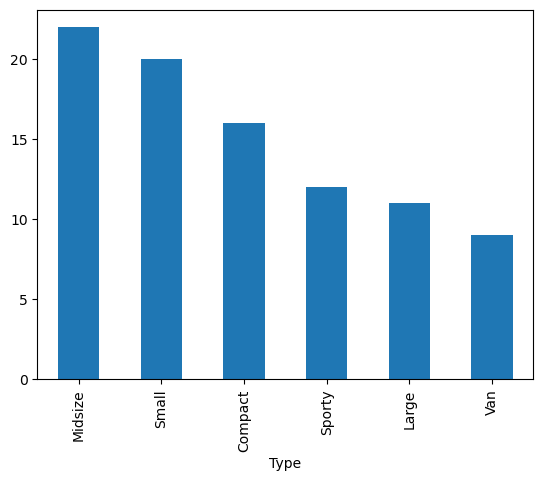

In [18]:
df2['Type'].value_counts().plot(kind='bar')

In [19]:
df2['Type'] = df2['Type'].fillna(method='ffill')

C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_14484\3483808123.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['Type'] = df2['Type'].fillna(method='ffill')


In [20]:
df2['Price'].values

array([15.9, 33.9, 29.1, 37.7, 30. , 15.7, 20.8, 23.7, 26.3, 34.7, 40.1,
       13.4, 11.4, 15.1, 15.9, 16.3, 16.6, 18.8, 38. , 18.4, 15.8, 29.5,
        9.2, 11.3, 13.3, 19. , 15.6, 25.8, 12.2, 19.3,  7.4, 10.1, 11.3,
       15.9, 14. , 19.9, 20.2, 20.9,  8.4, 12.5, 19.8, 12.1, 17.5,  8. ,
       10. , 10. , 13.9, 47.9, 28. , 35.2, 34.3, 36.1,  8.3, 11.6, 16.5,
       19.1, 32.5, 31.9, 61.9, 14.1, 14.9, 10.3, 26.1, 11.8, 15.7, 19.1,
       21.5, 13.5, 16.3, 19.5, 20.7, 14.4,  9. , 11.1, 17.7, 18.5, 24.4,
       28.7,  nan,  8.4, 10.9, 19.5,  8.6,  9.8, 18.4,  nan, 22.7,  9.1,
       19.7, 20. , 23.3, 22.7, 26.7])

In [21]:
import seaborn as sns

<Axes: >

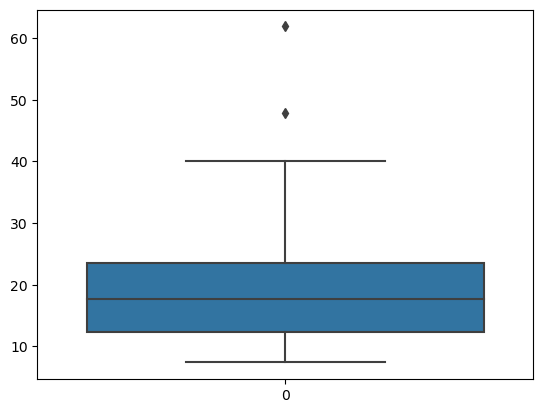

In [22]:
sns.boxplot(df2['Price'])

In [23]:
df2['Price'] = df2['Price'].fillna(df2['Price'].median())

In [24]:
df2['MPG.city'].values

array([25., 18., 20., 19., 22., 22., 19., 16., 19., 16., 16., 25., 25.,
       19., nan, 18., 15., 17., 17., 20., 23., 20., 29., 23., 22., 17.,
       21., nan, 29., 20., 31., 23., 22., 22., nan, 15., 21., 18., 46.,
       30., 24., 42., 24., 29., nan, 26., 20., 17., 18., 18., 17., 18.,
       29., 28., 26., 18., 17., nan, 19., 23., 19., 29., 18., 29., 24.,
       17., 21., 24., 23., 18., nan, nan, 31., nan, 19., 19., 19., 20.,
       nan, 33., 25., 23., 39., 32., 25., 22., 18., 25., 17., 21., 18.,
       21., 20.])

<Axes: >

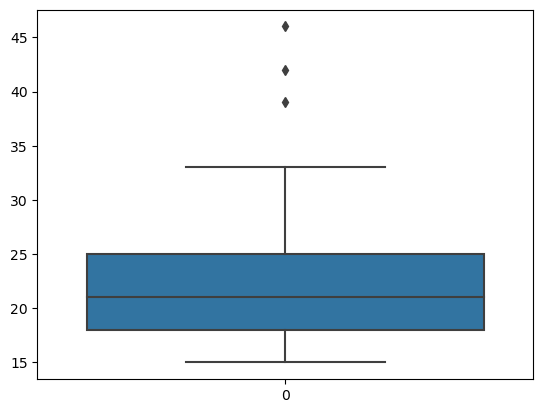

In [25]:
sns.boxplot(df2['MPG.city'])

In [26]:
df2['MPG.city'] = df2['MPG.city'].fillna(df2['MPG.city'].median())

In [27]:
df2['MPG.highway'].values

array([31., 25., 26., 26., 30., 31., 28., 25., 27., 25., 25., 36., 34.,
       28., 29., 23., 20., 26., 25., 28., 28., 26., 33., 29., 27., 21.,
       nan, 24., 33., 28., 33., 30., 27., 29., 30., 20., 30., 26., 50.,
       36., 31., 46., 31., 33., 29., 34., 27., 22., 24., 23., 26., 26.,
       37., 36., 34., 24., 25., 29., 25., 26., 26., nan, 24., 33., 30.,
       23., 26., 31., 31., 23., 28., 30., 41., 31., 28., 27., 28., 26.,
       38., 37., 30., 30., 43., 37., 32., 29., 22., 33., 21., 30., 25.,
       28., 28.])

<Axes: >

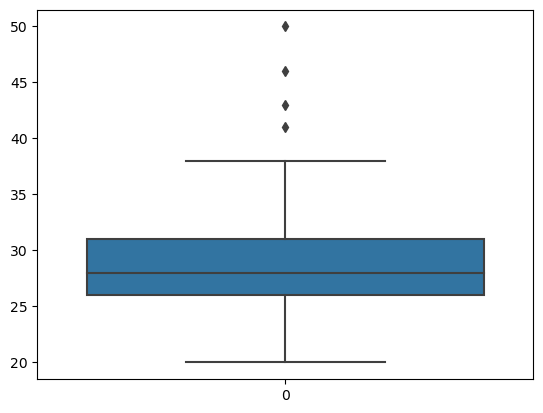

In [28]:
sns.boxplot(df2['MPG.highway'])

In [29]:
df2['MPG.highway'] = df2['MPG.highway'].fillna(df2['MPG.highway'].median())

<Axes: >

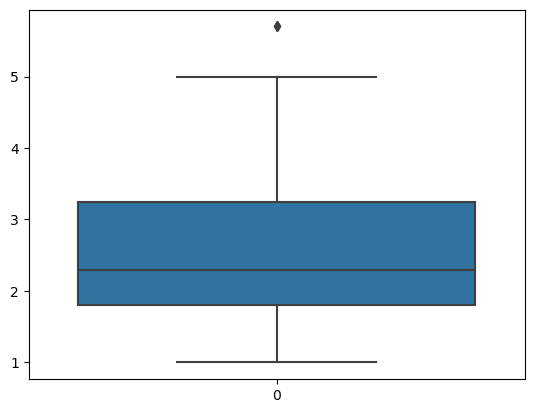

In [30]:
sns.boxplot(df2['EngineSize'])

In [31]:
df2['EngineSize'] = df2['EngineSize'].fillna(df2['EngineSize'].median())

In [32]:
df2['Horsepower'].values

array([140., 200., 172., 172., 208., 110., 170., 180., 170., 200., 295.,
        nan, 110., 160.,  nan, 170.,  nan, 170., 300., 153., 141., 147.,
        92.,  93., 100., 142., 100., 300.,  92.,  nan,  63., 127.,  96.,
       105., 115., 145.,  nan, 190.,  55.,  90., 160.,  nan, 140.,  81.,
       124.,  92., 128., 278., 185., 225., 160., 210.,  82., 103., 164.,
       155., 255., 130., 217., 100., 140.,  92., 202., 110., 150.,  nan,
       160., 155., 110., 170., 170.,  92.,  74., 110., 160., 200., 170.,
       140.,  85.,  73.,  90., 130.,  70.,  82., 135., 130., 138.,  81.,
       109., 134., 178., 114., 168.])

<Axes: >

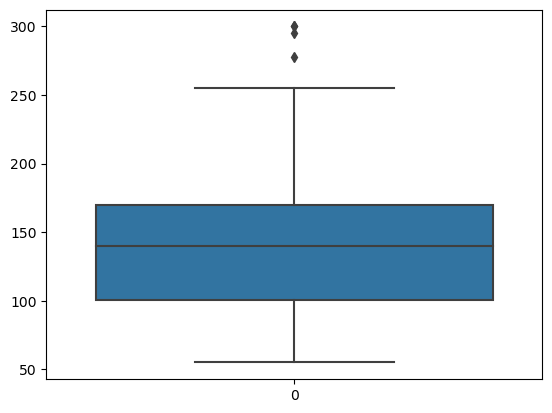

In [33]:
sns.boxplot(df2['Horsepower'])

In [34]:
df2['Horsepower'] = df2['Horsepower'].fillna(df2['Horsepower'].median())

In [35]:
df2['RPM'].values

array([6300., 5500., 5500., 5500., 5700., 5200., 4800., 4000., 4800.,
       4100., 6000., 5200., 5200., 4600., 5200., 4800., 4000., 4200.,
       5000., 5300., 5000., 4800., 6000., 4800., 4800., 5000., 4800.,
       6000., 6000., 5800., 5000., 6500., 4200., 4600., 5500., 4800.,
       4800., 4200., 5700., 5400., 5800., 5900., 5600., 5500., 6000.,
       5550., 6000., 6000.,   nan, 6000., 4400., 4600., 5000., 5500.,
       5600., 5000., 6500., 5100., 5500., 5750., 3800., 6000., 6000.,
       6000., 5600., 4800., 5200., 6000., 5200., 4800., 4800., 5000.,
       5600., 5200., 4600., 5000., 4800., 6000., 5000., 5600., 5200.,
         nan, 6000., 5200.,   nan, 5400., 5000., 5500., 4500., 5800.,
       5800., 5400., 6200.])

<Axes: >

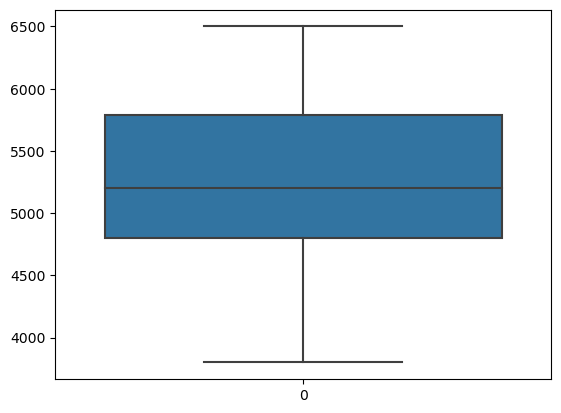

In [36]:
sns.boxplot(df2['RPM'])

In [37]:
df2['RPM'] = df2['RPM'].fillna(df2['RPM'].mean())

In [38]:
df2.columns

Index(['Manufacturer', 'Type', 'Price', 'MPG.city', 'MPG.highway', 'AirBags',
       'DriveTrain', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM',
       'Rev.per.mile', 'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers',
       'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
       'Luggage.room', 'Weight', 'Origin'],
      dtype='object')

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Type                93 non-null     object 
 2   Price               93 non-null     float64
 3   MPG.city            93 non-null     float64
 4   MPG.highway         93 non-null     float64
 5   AirBags             55 non-null     object 
 6   DriveTrain          86 non-null     object 
 7   Cylinders           88 non-null     object 
 8   EngineSize          93 non-null     float64
 9   Horsepower          93 non-null     float64
 10  RPM                 93 non-null     float64
 11  Rev.per.mile        87 non-null     float64
 12  Man.trans.avail     88 non-null     object 
 13  Fuel.tank.capacity  85 non-null     float64
 14  Passengers          91 non-null     float64
 15  Length              89 non-null     float64
 16  Wheelbase 

In [40]:
df2['Rev.per.mile'].values

array([2890., 2335., 2280., 2535., 2545., 2565.,   nan, 1320., 1690.,
         nan, 1985., 2380., 2665., 1805., 2595., 1690., 1790., 1350.,
       1450., 1990., 2090., 1785., 3285.,   nan, 2535., 1970., 2465.,
       2120., 2505., 1980., 3150., 2410., 2805., 2285., 2340., 2080.,
       1885.,   nan, 3755., 3250., 2855., 2650.,   nan, 2710., 2745.,
       2540., 2335., 1955., 2325., 2510., 1835., 1840., 2370., 2220.,
       2505., 2240., 2325., 2425., 2220., 2475., 1730., 2505., 2210.,
       2435., 2130., 2065., 2045., 2380., 2565., 1690., 1570., 2360.,
       3130., 2665., 1805., 1890., 1565., 2910., 2145., 2875., 3375.,
       2330., 3360., 3505., 2405., 2340., 2515., 2550., 2915., 2685.,
       2385., 2215.,   nan])

<Axes: >

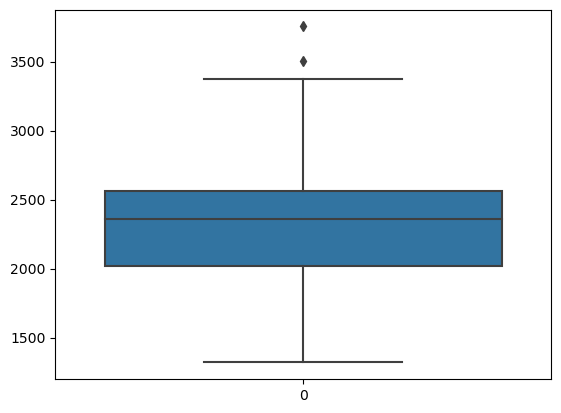

In [41]:
sns.boxplot(df2['Rev.per.mile'])

In [42]:
df2['Rev.per.mile'] = df2['Rev.per.mile'].fillna(df2['Rev.per.mile'].median())

In [43]:
df2['Fuel.tank.capacity'].values

array([13.2, 18. , 16.9, 21.1, 21.1, 16.4,  nan, 23. , 18.8, 18. , 20. ,
       15.2, 15.6,  nan, 16.5, 20. , 27. , 23. , 20. , 18. , 16. , 16. ,
        nan, 14. ,  nan, 20. , 16. , 19.8, 13.2, 18. , 10. , 13.2, 15.9,
       15.4, 15.5, 21. ,  nan, 20. , 10.6, 12.4,  nan, 11.9, 17. , 11.9,
       13.7, 11.9, 17.2, 22.5, 18.5,  nan, 18.4, 20. , 13.2, 14.5, 15.5,
       19.6, 20. , 14.5, 18.5, 11.1, 18. , 13.2, 19. , 13.2, 15.9, 20. ,
       18.5, 15.2,  nan, 20. , 18. , 15.9, 13.2, 15.2, 15.5, 16.5, 18. ,
       18. , 12.8,  9.2, 15.9, 15.9, 10.6, 11.9, 15.9, 18.5, 19.8, 12.4,
       21.1, 18.5, 18.5, 15.8, 19.3])

<Axes: >

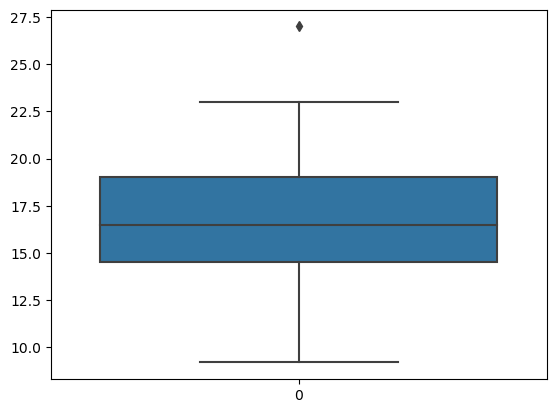

In [44]:
sns.boxplot(df2['Fuel.tank.capacity'])

In [45]:
df2['Fuel.tank.capacity'] = df2['Fuel.tank.capacity'].fillna(df2['Fuel.tank.capacity'].median())

In [46]:
df2['Passengers'].values

array([ 5.,  5.,  5.,  6.,  4.,  6.,  6.,  6.,  5.,  6.,  5.,  5.,  5.,
        4.,  6.,  7.,  8.,  6.,  2.,  6.,  6.,  6.,  5.,  5.,  6.,  7.,
        6.,  4.,  5.,  6.,  4.,  5.,  5.,  4.,  4.,  7.,  5.,  6.,  4.,
        4.,  4.,  4.,  4.,  5.,  5.,  4.,  5.,  5.,  5.,  4.,  6., nan,
        4.,  5.,  5.,  7.,  2.,  5.,  5.,  4.,  5.,  5.,  5.,  5.,  5.,
        7.,  5.,  5.,  5.,  7.,  6.,  4.,  4.,  5.,  4.,  5.,  6.,  5.,
        5.,  4.,  5.,  5.,  4., nan,  4.,  5.,  7.,  4.,  7.,  5.,  4.,
        5.,  5.])

<Axes: >

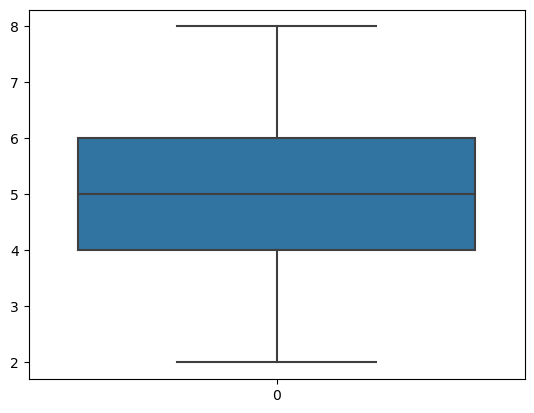

In [47]:
sns.boxplot(df2['Passengers'])

C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_14484\1185285535.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Passengers'])
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Passengers', ylabel='Density'>

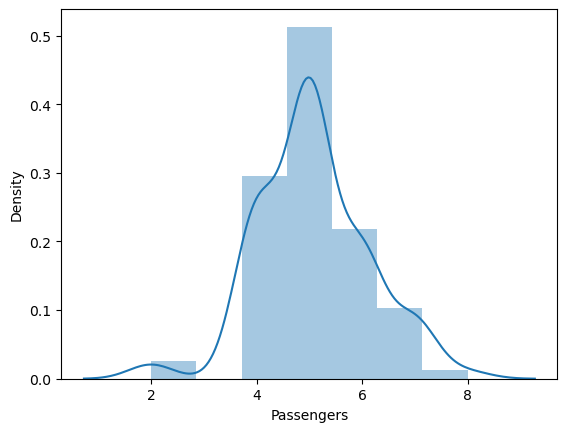

In [48]:
sns.distplot(df2['Passengers'])

In [49]:
df2['Passengers'] = df2['Passengers'].fillna(df2['Passengers'].mean())

In [50]:
df2['Length'].values

array([177., 195., 180., 193., 186., 189., 200., 216., 198., 206., 204.,
       182., 184., 193.,  nan, 178., 194., 214., 179., 203., 183., 203.,
       174., 172., 181., 175., 192., 180., 174., 202., 141., 171., 177.,
       180., 179., 176., 192., 212., 151., 164., 175., 173., 185., 168.,
       172., 166., 184., 200., 188., 191., 205., 219., 164., 172., 184.,
       190., 169., 175.,  nan, 166., 199., 172., 190., 170., 181., 190.,
       188., 188., 190.,  nan, 201., 173., 177., 181., 196., 195., 177.,
        nan, 176., 146., 175., 179., 161., 162., 174., 188., 187., 163.,
       187., 180., 159., 190., 184.])

<Axes: >

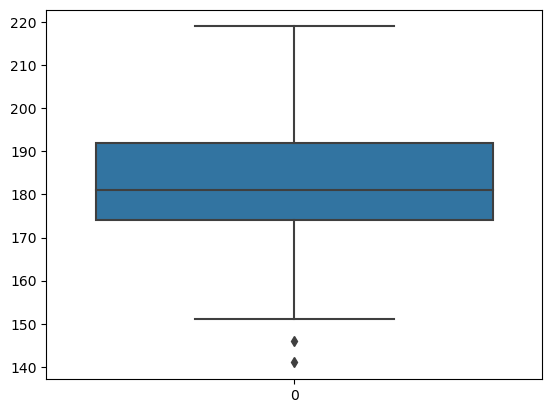

In [51]:
sns.boxplot(df2['Length'])

In [52]:
df2['Length'] = df2['Length'].fillna(df2['Length'].median())

In [53]:
df2['Wheelbase'].values

array([102., 115., 102., 106., 109., 105., 111., 116., 108., 114., 111.,
       101., 103., 101., 108., 110., 111., 116.,  96., 113., 104., 110.,
        98.,  97., 104., 112., 105.,  97.,  98., 113.,  90.,  98., 100.,
       101., 103., 119., 106., 114.,  93.,  97., 100.,  nan, 107.,  94.,
        98.,  94., 104., 113., 103., 106., 109., 117.,  97.,  98., 103.,
       110.,  96., 105., 110.,  95., 113.,  98., 107.,  96., 103., 112.,
       104., 103., 105., 110., 111.,  97.,  99., 101., 101., 108., 111.,
        99., 102.,  90.,  97., 102.,  93.,  94.,  99., 103., 113.,  93.,
       115., 103.,  97., 104., 105.])

<Axes: >

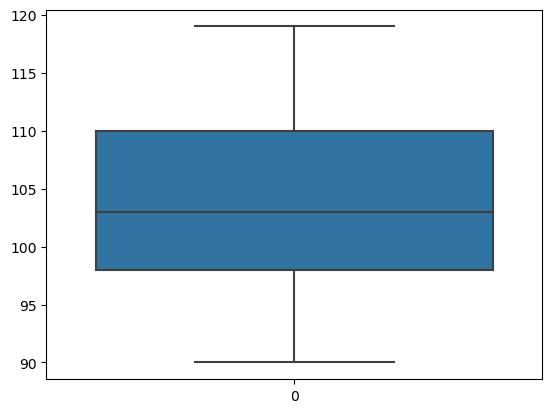

In [54]:
sns.boxplot(df2['Wheelbase'])

<Axes: xlabel='Wheelbase'>

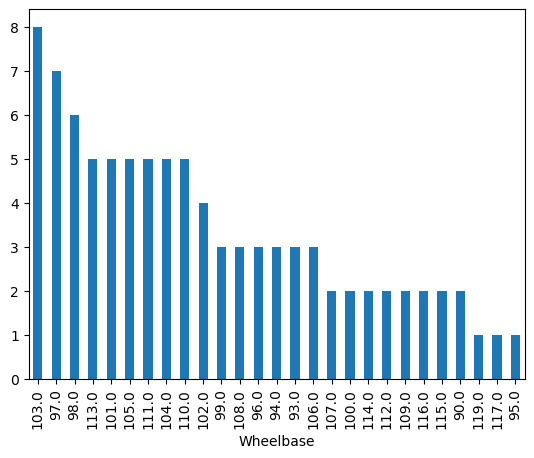

In [55]:
df2['Wheelbase'].value_counts().plot(kind='bar')

C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_14484\2025030694.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Wheelbase'])
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Wheelbase', ylabel='Density'>

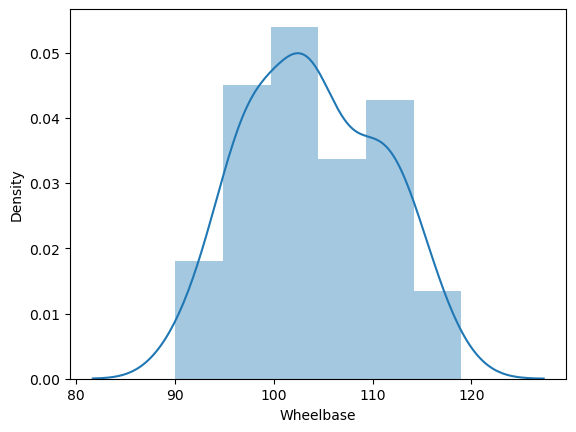

In [56]:
sns.distplot(df2['Wheelbase'])

In [57]:
df2['Wheelbase'] = df2['Wheelbase'].fillna(df2['Wheelbase'].mean())

In [58]:
df2['Width'].values

array([68., 71., 67., nan, 69., 69., 74., 78., nan, 73., 74., 66., 68.,
       74., 71., 74., 78., 77., 74., 74., 68., 69., 66., 67., 68., 72.,
       69., nan, 66., 74., 63., 67., 68., 68., 70., 72., 71., 78., 63.,
       nan, 70., 67., 67., 63., 66., 64., 69., 72., 70., 71., 73., 77.,
       66., 66., 69., 72., 69., 67., 69., 65., 73., 67., 70., 66., 67.,
       74., 69., 67., 70., 74., 74., 67., 66., 66., 75., 72., 74., 67.,
       68., 60., 65., 67., nan, nan, 69., 70., 71., 63., 72., 67., 66.,
       67., 69.])

<Axes: >

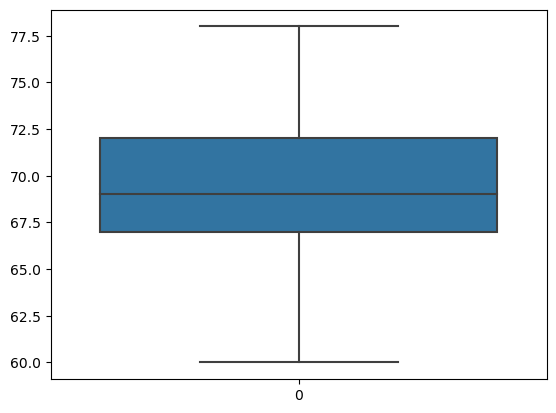

In [59]:
sns.boxplot(df2['Width'])

C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_14484\2915268940.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Width'])
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Width', ylabel='Density'>

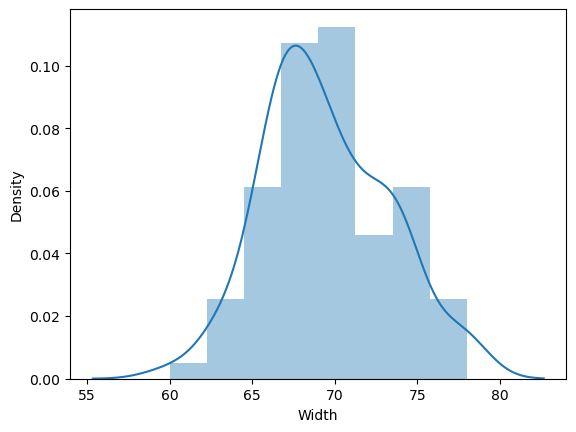

In [60]:
sns.distplot(df2['Width'])

In [61]:
df2['Width'] = df2['Width'].fillna(df2['Width'].mean())

In [62]:
df2['Turn.circle'].values

array([37., 38., 37., 37., 39., 41., 42., 45., 41., 43., 44., 38., 39.,
       43., nan, 44., 42., 42., 43., nan, 41., 44., 32., 38., 39., 42.,
       42., 40., 36., 40., 33., 36., nan, 40., 38., 45., 40., 43., 34.,
       37., 39., 36., 41., 35., 36., 34., 41., 42., 40., 39., 42., 45.,
       34., 36., 40., 39., nan, 34., 37., 36., 38., 36., 43., 33., 40.,
       41., 41., 39., 42., 44., 42., 39., 35., 39., 43., 41., 43., 37.,
       40., 32., 35., 37., 34., 36., nan, 38., 41., 34., 38., 35., 36.,
       37., 38.])

<Axes: >

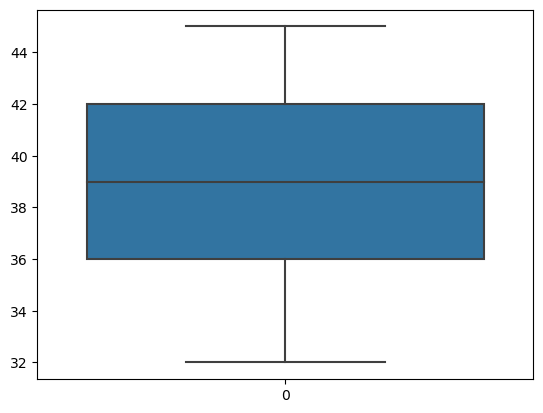

In [63]:
sns.boxplot(df2['Turn.circle'])

C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_14484\3210128490.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Turn.circle'])
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Turn.circle', ylabel='Density'>

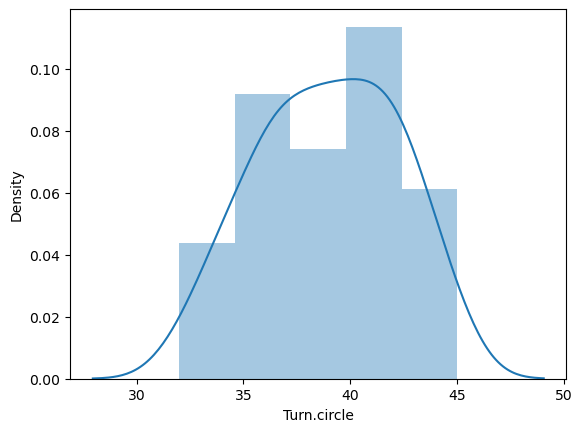

In [64]:
sns.distplot(df2['Turn.circle'])

In [65]:
df2['Turn.circle'] = df2['Turn.circle'].fillna(df2['Turn.circle'].mean())

In [66]:
df2['Rear.seat.room'].values

array([26.5, 30. , 28. , 31. , 27. , 28. , 30.5, 30.5, 26.5, 35. , 31. ,
       25. , 26. , 25. , 28.5, 30.5, 33.5, 29.5,  nan, 31. , 30.5, 36. ,
        nan, 26.5, 30.5, 26.5, 30.5, 20. , 26.5, 30. , 26. , 28. , 27.5,
       24. , 23. , 30. , 27.5, 30. , 27.5, 24.5, 23.5, 28. , 28. , 26. ,
       28. , 23.5, 31. , 29. , 27.5, 25. , 30. , 31.5, 27. , 26.5, 29.5,
       27.5,  nan, 26. ,  nan, 19. , 28. , 26. , 27.5, 26. , 28.5, 27. ,
       28.5, 28. , 28. , 30.5, 31.5, 24.5, 25.5, 25. , 25. , 28.5, 30.5,
       26.5, 26.5, 23.5, 27.5, 27. , 27.5, 24. , 23. , 28.5, 35. , 26. ,
       34. , 31.5, 26. , 29.5, 30. ])

<Axes: >

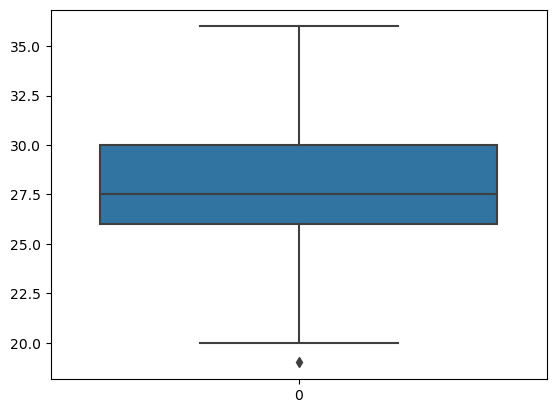

In [67]:
sns.boxplot(df2['Rear.seat.room'])

C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_14484\177160809.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Rear.seat.room'])
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rear.seat.room', ylabel='Density'>

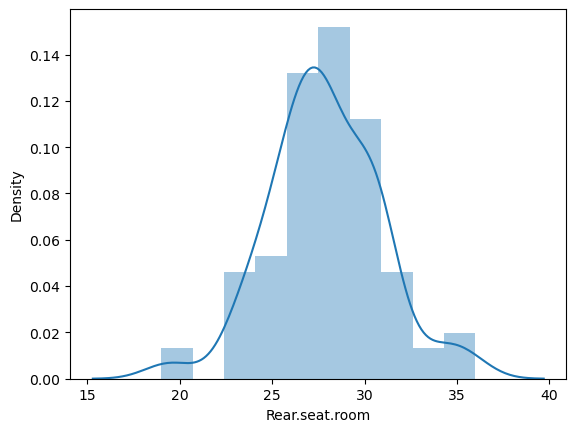

In [68]:
sns.distplot(df2['Rear.seat.room'])

In [69]:
df2['Rear.seat.room'] = df2['Rear.seat.room'].fillna(df2['Rear.seat.room'].median())

In [70]:
df2['Luggage.room'].values

array([nan, 15., 14., 17., 13., 16., 17., 21., 14., 18., nan, 13., nan,
       13., 16., nan, nan, 20., nan, 15., 14., 17., 11., nan, nan, nan,
       16., 11., 11., 15., 12., 12., 13., 12., 18., nan, 18., 21., 10.,
       11.,  8., 12., 14., 11., 12.,  9., nan, 15., 14.,  9., 19., 22.,
       16., 13., 14., nan, nan, 12., 15.,  6., 15., 11., 14., nan, 14.,
       nan, 14., 14., 16., nan, 17.,  8., 17., 13., 13., 16., 18., 14.,
       nan, 10., 15., 14., 10., 11., 13., 15., nan, 10., nan, 14., 15.,
       14., 15.])

<Axes: >

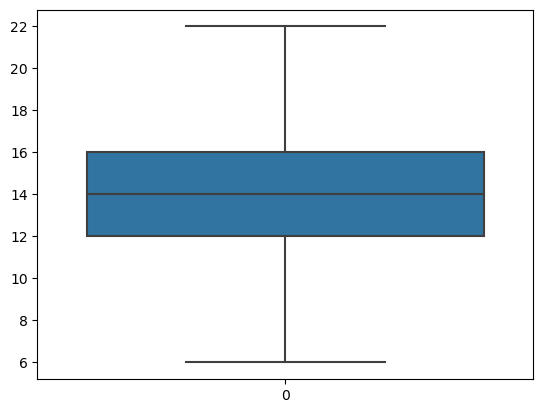

In [71]:
sns.boxplot(df2['Luggage.room'])

C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_14484\1591884010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Luggage.room'])
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Luggage.room', ylabel='Density'>

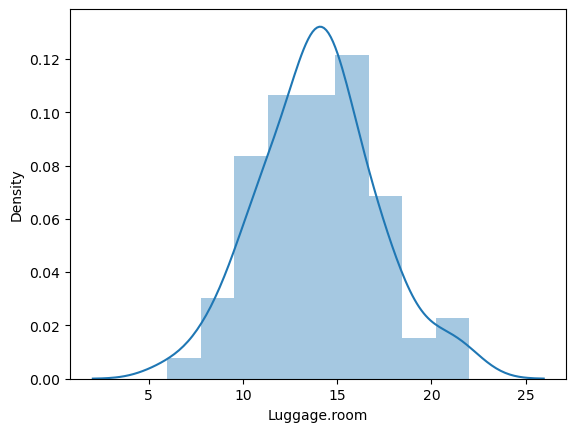

In [72]:
sns.distplot(df2['Luggage.room'])

In [73]:
df2['Luggage.room'] = df2['Luggage.room'].fillna(df2['Luggage.room'].mean())

In [74]:
df2['Weight'].values

array([2705., 3560., 3375., 3405., 3640.,   nan, 3470., 4105., 3495.,
       3620., 3935., 2490., 2785., 3240., 3195., 3715., 4025., 3910.,
       3380., 3515., 3085., 3570., 2270., 2670., 2970., 3705., 3080.,
       3805., 2295., 3490., 1845., 2530.,   nan,   nan, 2710., 3735.,
       3325., 3950., 1695., 2475., 2865.,   nan, 3040., 2345., 2620.,
       2285., 2885., 4000., 3510., 3515., 3695., 4055., 2325., 2440.,
       2970., 3735.,   nan, 2920., 3525., 2450., 3610., 2295., 3730.,
         nan, 3050., 4100., 3200., 2910., 2890., 3715., 3470., 2640.,
       2350.,   nan, 3240., 3450., 3495., 2775., 2495., 2045., 2490.,
       3085., 1965., 2055., 2950., 3030., 3785., 2240., 3960., 2985.,
       2810., 2985., 3245.])

<Axes: >

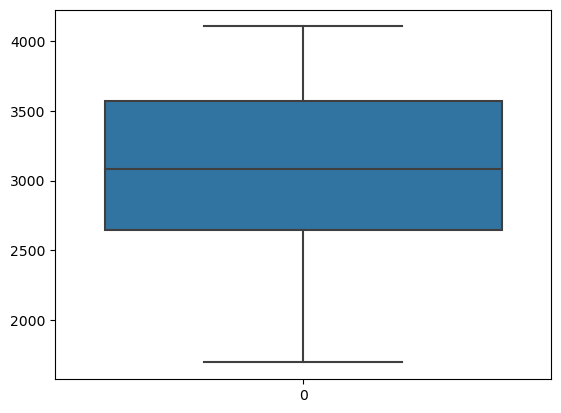

In [75]:
sns.boxplot(df2['Weight'])

C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_14484\3361139625.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Weight'])
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Density'>

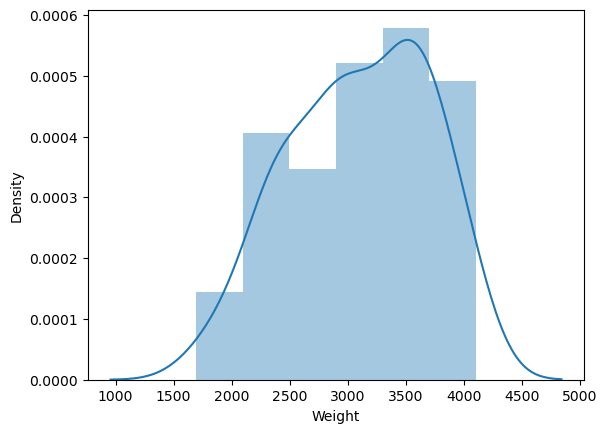

In [76]:
sns.distplot(df2['Weight'])

In [77]:
df2['Weight'] = df2['Weight'].fillna(df2['Weight'].mean())

In [78]:
df2

,Manufacturer,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Small,15.9,25.0,31.0,NaN,Front,4,1.8,140.0,...,13.2,5.0,177.0,102.0,68.000000,37.0,26.5,13.986486,2705.0,non-USA
1,Acura,Midsize,33.9,18.0,25.0,Driver & Passenger,Front,6,3.2,200.0,...,18.0,5.0,195.0,115.0,71.000000,38.0,30.0,15.000000,3560.0,non-USA
2,Audi,Compact,29.1,20.0,26.0,Driver only,Front,6,2.8,172.0,...,16.9,5.0,180.0,102.0,67.000000,37.0,28.0,14.000000,3375.0,non-USA
3,Audi,Midsize,37.7,19.0,26.0,Driver & Passenger,NaN,6,2.3,172.0,...,21.1,6.0,193.0,106.0,69.448276,37.0,31.0,17.000000,3405.0,non-USA
4,BMW,Midsize,30.0,22.0,30.0,NaN,Rear,4,3.5,208.0,...,21.1,4.0,186.0,109.0,69.000000,39.0,27.0,13.000000,3640.0,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Van,19.7,17.0,21.0,NaN,Front,5,2.5,109.0,...,21.1,7.0,187.0,115.0,72.000000,38.0,34.0,13.986486,3960.0,NaN
89,Volkswagen,Compact,20.0,21.0,30.0,NaN,Front,4,2.0,134.0,...,18.5,5.0,180.0,103.0,67.000000,35.0,31.5,14.000000,2985.0,non-USA
90,Volkswagen,Sporty,23.3,18.0,25.0,NaN,Front,6,2.8,178.0,...,18.5,4.0,159.0,97.0,66.000000,36.0,26.0,15.000000,2810.0,non-USA
91,Volvo,Compact,22.7,21.0,28.0,Driver only,Rear,NaN,2.3,114.0,...,15.8,5.0,190.0,104.0,67.000000,37.0,29.5,14.000000,2985.0,non-USA


In [79]:
df2.isnull().sum()

Manufacturer           0
Type                   0
Price                  0
MPG.city               0
MPG.highway            0
AirBags               38
DriveTrain             7
Cylinders              5
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        5
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         0
Luggage.room           0
Weight                 0
Origin                 5
dtype: int64

<Axes: xlabel='AirBags'>

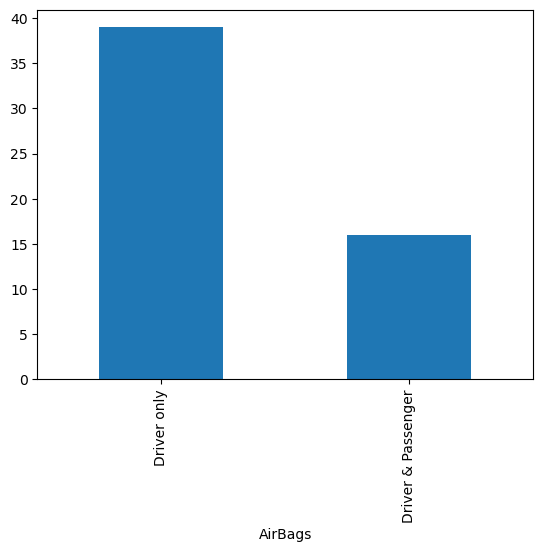

In [80]:
df2['AirBags'].value_counts().plot(kind='bar')

In [81]:
df2['AirBags'] = df2['AirBags'].fillna('Driver only')

In [82]:
df2

,Manufacturer,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Small,15.9,25.0,31.0,Driver only,Front,4,1.8,140.0,...,13.2,5.0,177.0,102.0,68.000000,37.0,26.5,13.986486,2705.0,non-USA
1,Acura,Midsize,33.9,18.0,25.0,Driver & Passenger,Front,6,3.2,200.0,...,18.0,5.0,195.0,115.0,71.000000,38.0,30.0,15.000000,3560.0,non-USA
2,Audi,Compact,29.1,20.0,26.0,Driver only,Front,6,2.8,172.0,...,16.9,5.0,180.0,102.0,67.000000,37.0,28.0,14.000000,3375.0,non-USA
3,Audi,Midsize,37.7,19.0,26.0,Driver & Passenger,NaN,6,2.3,172.0,...,21.1,6.0,193.0,106.0,69.448276,37.0,31.0,17.000000,3405.0,non-USA
4,BMW,Midsize,30.0,22.0,30.0,Driver only,Rear,4,3.5,208.0,...,21.1,4.0,186.0,109.0,69.000000,39.0,27.0,13.000000,3640.0,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Van,19.7,17.0,21.0,Driver only,Front,5,2.5,109.0,...,21.1,7.0,187.0,115.0,72.000000,38.0,34.0,13.986486,3960.0,NaN
89,Volkswagen,Compact,20.0,21.0,30.0,Driver only,Front,4,2.0,134.0,...,18.5,5.0,180.0,103.0,67.000000,35.0,31.5,14.000000,2985.0,non-USA
90,Volkswagen,Sporty,23.3,18.0,25.0,Driver only,Front,6,2.8,178.0,...,18.5,4.0,159.0,97.0,66.000000,36.0,26.0,15.000000,2810.0,non-USA
91,Volvo,Compact,22.7,21.0,28.0,Driver only,Rear,NaN,2.3,114.0,...,15.8,5.0,190.0,104.0,67.000000,37.0,29.5,14.000000,2985.0,non-USA


<Axes: xlabel='DriveTrain'>

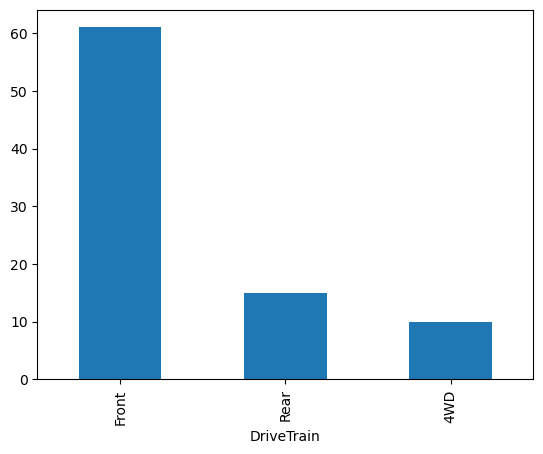

In [83]:
df2['DriveTrain'].value_counts().plot(kind='bar')

In [84]:
df2['DriveTrain'] = df2['DriveTrain'].fillna('Front')

<Axes: xlabel='Cylinders'>

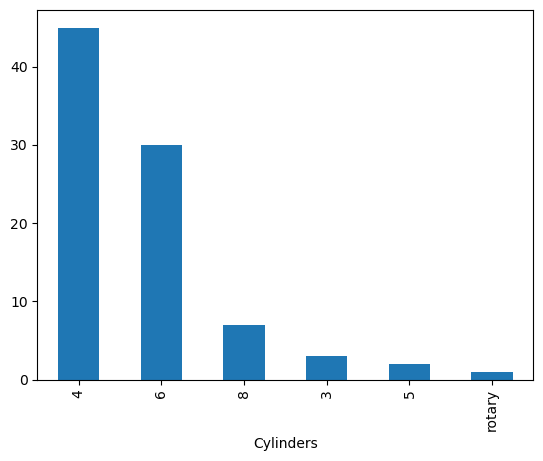

In [85]:
df2['Cylinders'].value_counts().plot(kind='bar')

In [86]:
df2['Cylinders'] = df2['Cylinders'].fillna('4')

<Axes: xlabel='Man.trans.avail'>

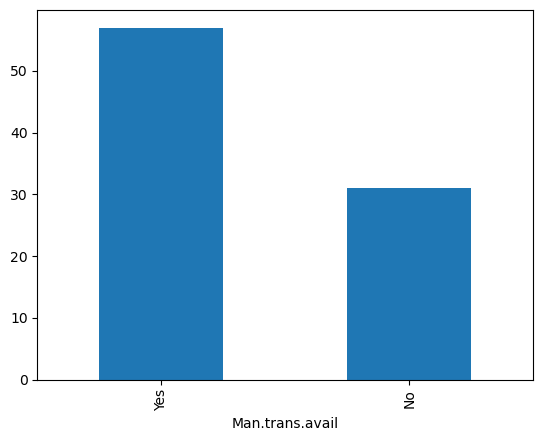

In [87]:
df2['Man.trans.avail'].value_counts().plot(kind='bar')

In [88]:
df2['Man.trans.avail'] = df2['Man.trans.avail'].fillna('Yes')

<Axes: xlabel='Origin'>

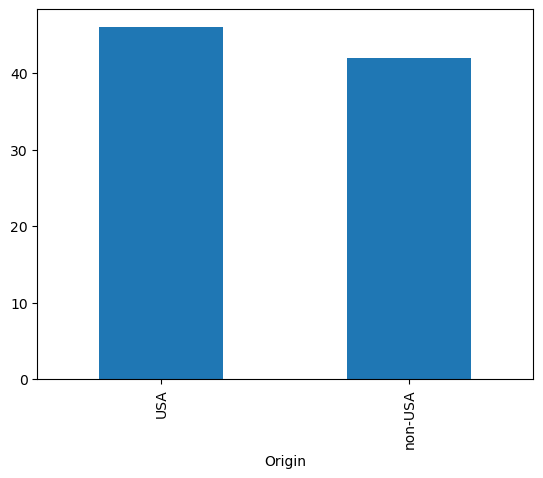

In [89]:
df2['Origin'].value_counts().plot(kind='bar')

In [90]:
df2['Origin'] = df2['Origin'].fillna(method='ffill')

C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_14484\3687462320.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['Origin'] = df2['Origin'].fillna(method='ffill')


In [91]:
df2.isnull().sum()

Manufacturer          0
Type                  0
Price                 0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
dtype: int64

In [92]:
import numpy as np

In [93]:
c = np.unique(df2['Manufacturer'])

In [94]:
df2['Manufacturer'].value_counts()

Manufacturer
Chevrolet        8
Ford             8
Dodge            6
Acura            5
Pontiac          5
Mazda            5
Toyota           4
Buick            4
Volkswagen       4
Oldsmobile       4
Hyundai          4
Nissan           4
Subaru           3
Honda            3
Mercedes-Benz    2
Mitsubishi       2
Mercury          2
Lincoln          2
Audi             2
Geo              2
Eagle            2
Chrysler         2
Cadillac         2
Lexus            1
Infiniti         1
Plymouth         1
Saab             1
Saturn           1
Suzuki           1
BMW              1
Volvo            1
Name: count, dtype: int64

In [95]:
## price ,  MPG city

In [96]:
df2['Price'].describe()

count    93.000000
mean     19.575269
std       9.622061
min       7.400000
25%      12.500000
50%      17.700000
75%      23.300000
max      61.900000
Name: Price, dtype: float64

In [97]:
percentile25_price = df2['Price'].quantile(0.25)
percentile75_price = df2['Price'].quantile(0.75)

In [98]:
IQR = percentile75_price - percentile25_price

In [99]:
IQR

10.8

In [100]:
upper_limit_price = percentile75_price + 1.5*IQR
lower_limit_price = percentile25_price - 1.5*IQR

In [101]:
upper_limit_price , lower_limit_price

(39.5, -3.700000000000003)

In [102]:
df2['Price'] = np.where(df2['Price'] > upper_limit_price , upper_limit_price , np.where(df2['Price'] < lower_limit_price , lower_limit_price , df2['Price']))

<Axes: >

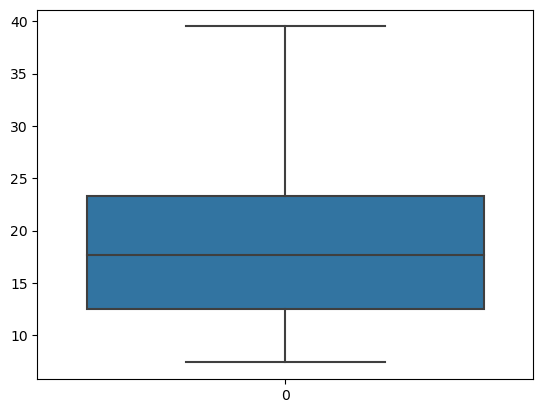

In [103]:
sns.boxplot(df2['Price'])

In [104]:
df2['MPG.city'].describe()

count    93.000000
mean     22.268817
std       5.564132
min      15.000000
25%      18.000000
50%      21.000000
75%      24.000000
max      46.000000
Name: MPG.city, dtype: float64

In [105]:
percentile25_mc = df2['MPG.city'].quantile(0.25)
percentile75_mc = df2['MPG.city'].quantile(0.75)

In [106]:
IQR = percentile75_mc - percentile25_mc

In [107]:
IQR

6.0

In [108]:
upper_limit_mc = percentile75_mc + 1.5*IQR
lower_limit_mc = percentile25_mc - 1.5*IQR

In [109]:
upper_limit_mc , lower_limit_mc

(33.0, 9.0)

In [110]:
df2['MPG.city'] = np.where(df2['MPG.city'] > upper_limit_mc , upper_limit_mc , np.where(df2['MPG.city'] < lower_limit_mc , lower_limit_mc , df2['MPG.city']))

<Axes: >

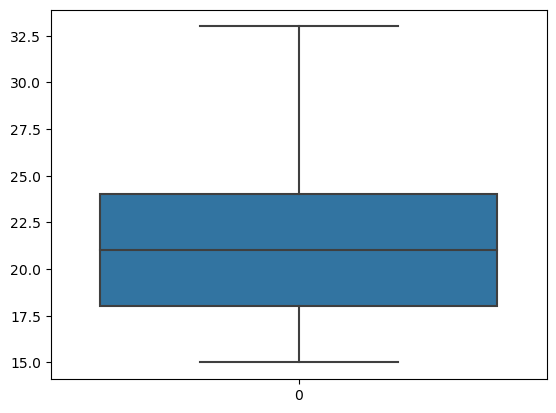

In [111]:
sns.boxplot(df2['MPG.city'])

In [112]:
df2['MPG.highway'].describe()

count    93.000000
mean     29.043011
std       5.313874
min      20.000000
25%      26.000000
50%      28.000000
75%      31.000000
max      50.000000
Name: MPG.highway, dtype: float64

In [113]:
percentile25_mh = df2['MPG.highway'].quantile(0.25)
percentile75_mh = df2['MPG.highway'].quantile(0.75)

In [114]:
IQR = percentile75_mh - percentile25_mh

In [115]:
IQR

5.0

In [116]:
upper_limit_mh = percentile75_mh + 1.5*IQR
lower_limit_mh = percentile25_mh - 1.5*IQR

In [117]:
upper_limit_mh , lower_limit_mh

(38.5, 18.5)

In [118]:
df2['MPG.highway'] = np.where(df2['MPG.highway'] > upper_limit_mh , upper_limit_mh , np.where(df2['MPG.highway'] < lower_limit_mh , lower_limit_mh , df2['MPG.highway']))

<Axes: >

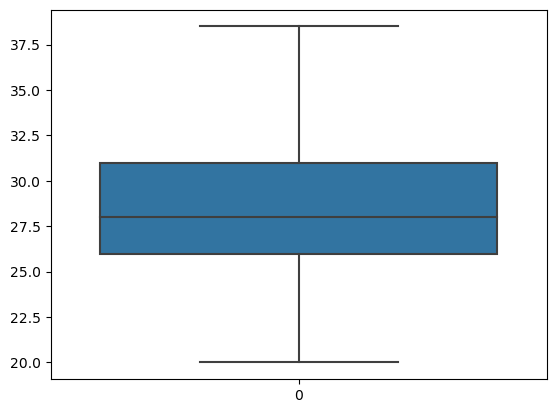

In [119]:
sns.boxplot(df2['MPG.highway'])

In [120]:
percentile25_es = df2['EngineSize'].quantile(0.25)
percentile75_es = df2['EngineSize'].quantile(0.75)

In [121]:
IQR = percentile75_es - percentile25_es

In [122]:
upper_limit_es = percentile75_es + 1.5*IQR
lower_limit_es = percentile25_es - 1.5*IQR

In [123]:
df2['EngineSize'] = np.where(df2['EngineSize'] > upper_limit_es , upper_limit_es , np.where(df2['EngineSize'] < lower_limit_es , lower_limit_es , df2['EngineSize']))

<Axes: >

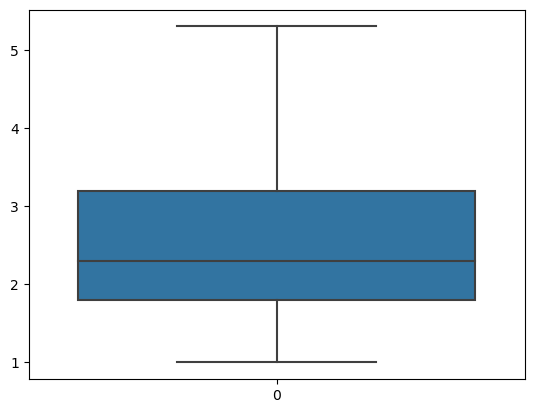

In [124]:
sns.boxplot(df2['EngineSize'])

In [125]:
percentile25_hp = df2['Horsepower'].quantile(0.25)
percentile75_hp = df2['Horsepower'].quantile(0.75)

In [126]:
IQR = percentile75_hp - percentile25_hp

In [127]:
upper_limit_hp = percentile75_hp + 1.5*IQR
lower_limit_hp = percentile25_hp - 1.5*IQR

In [128]:
df2['Horsepower'] = np.where(df2['Horsepower'] > upper_limit_hp , upper_limit_hp , np.where(df2['Horsepower'] < lower_limit_hp , lower_limit_hp , df2['Horsepower']))

<Axes: >

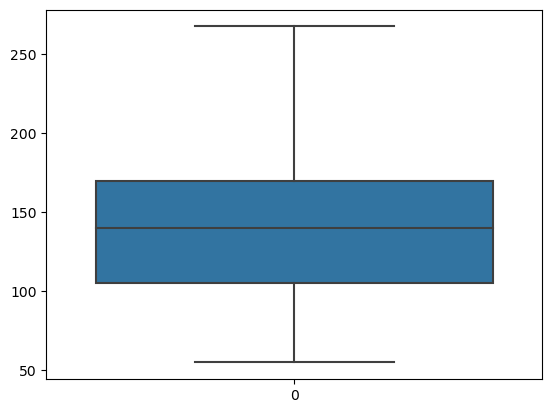

In [129]:
sns.boxplot(df2['Horsepower'])

In [130]:
percentile25_rpm = df2['Rev.per.mile'].quantile(0.25)
percentile75_rpm = df2['Rev.per.mile'].quantile(0.75)
IQR = percentile75_rpm - percentile25_rpm
upper_limit_rpm = percentile75_rpm + 1.5*IQR
lower_limit_rpm = percentile25_rpm - 1.5*IQR
df2['Rev.per.mile'] = np.where(df2['Rev.per.mile'] > upper_limit_rpm , upper_limit_rpm , np.where(df2['Rev.per.mile'] < lower_limit_rpm , lower_limit_rpm , df2['Rev.per.mile']))

<Axes: >

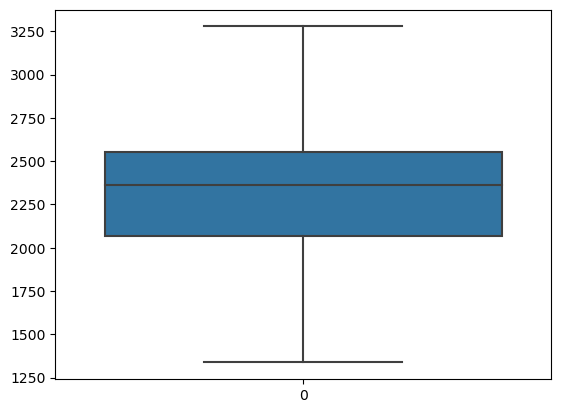

In [131]:
sns.boxplot(df2['Rev.per.mile'])

In [132]:
percentile25_ftc = df2['Fuel.tank.capacity'].quantile(0.25)
percentile75_ftc = df2['Fuel.tank.capacity'].quantile(0.75)
IQR = percentile75_ftc - percentile25_ftc
upper_limit_ftc = percentile75_ftc + 1.5*IQR
lower_limit_ftc = percentile25_ftc - 1.5*IQR
df2['Fuel.tank.capacity'] = np.where(df2['Fuel.tank.capacity'] > upper_limit_ftc , upper_limit_ftc , np.where(df2['Fuel.tank.capacity'] < lower_limit_ftc , lower_limit_ftc , df2['Fuel.tank.capacity']))

<Axes: >

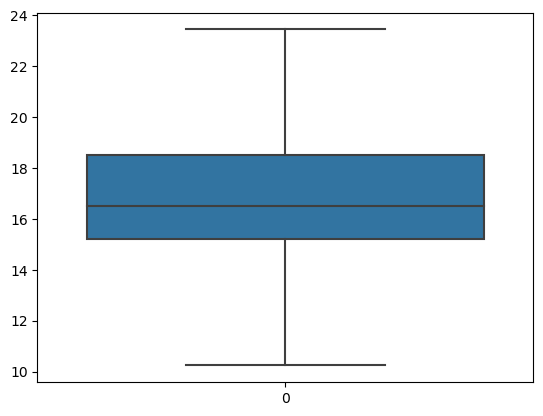

In [133]:
sns.boxplot(df2['Fuel.tank.capacity'])

In [134]:
percentile25_l = df2['Length'].quantile(0.25)
percentile75_l = df2['Length'].quantile(0.75)
IQR = percentile75_l - percentile25_l
upper_limit_l = percentile75_l + 1.5*IQR
lower_limit_l = percentile25_l - 1.5*IQR
df2['Length'] = np.where(df2['Length'] > upper_limit_l , upper_limit_l , np.where(df2['Length'] < lower_limit_l , lower_limit_l , df2['Length']))

<Axes: >

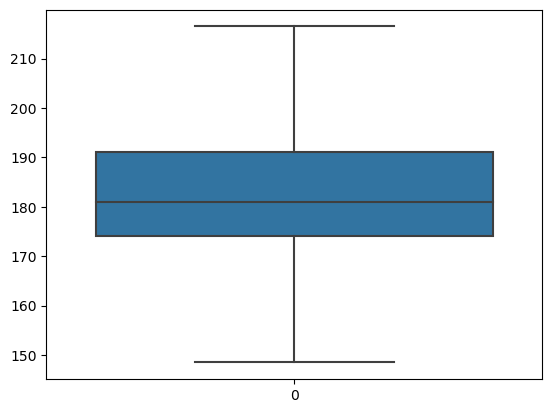

In [135]:
sns.boxplot(df2['Length'])

In [136]:
percentile25_rsr = df2['Rear.seat.room'].quantile(0.25)
percentile75_rsr = df2['Rear.seat.room'].quantile(0.75)
IQR = percentile75_rsr - percentile25_rsr
upper_limit_rsr = percentile75_rsr + 1.5*IQR
lower_limit_rsr = percentile25_rsr - 1.5*IQR
df2['Rear.seat.room'] = np.where(df2['Rear.seat.room'] > upper_limit_rsr , upper_limit_rsr , np.where(df2['Rear.seat.room'] < lower_limit_rsr , lower_limit_rsr , df2['Rear.seat.room']))

<Axes: >

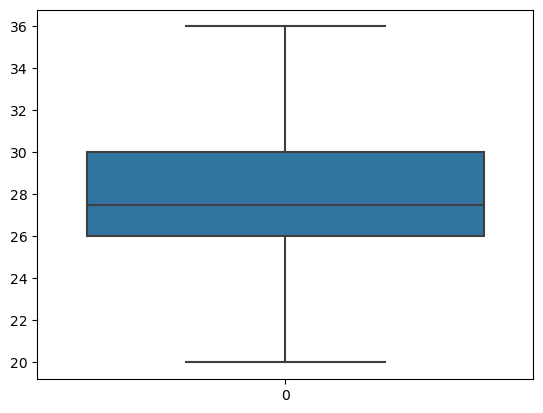

In [137]:
sns.boxplot(df2['Rear.seat.room'])

In [138]:
df2

,Manufacturer,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Small,15.9,25.0,31.0,Driver only,Front,4,1.8,140.0,...,13.2,5.0,177.0,102.0,68.000000,37.0,26.5,13.986486,2705.0,non-USA
1,Acura,Midsize,33.9,18.0,25.0,Driver & Passenger,Front,6,3.2,200.0,...,18.0,5.0,195.0,115.0,71.000000,38.0,30.0,15.000000,3560.0,non-USA
2,Audi,Compact,29.1,20.0,26.0,Driver only,Front,6,2.8,172.0,...,16.9,5.0,180.0,102.0,67.000000,37.0,28.0,14.000000,3375.0,non-USA
3,Audi,Midsize,37.7,19.0,26.0,Driver & Passenger,Front,6,2.3,172.0,...,21.1,6.0,193.0,106.0,69.448276,37.0,31.0,17.000000,3405.0,non-USA
4,BMW,Midsize,30.0,22.0,30.0,Driver only,Rear,4,3.5,208.0,...,21.1,4.0,186.0,109.0,69.000000,39.0,27.0,13.000000,3640.0,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Van,19.7,17.0,21.0,Driver only,Front,5,2.5,109.0,...,21.1,7.0,187.0,115.0,72.000000,38.0,34.0,13.986486,3960.0,non-USA
89,Volkswagen,Compact,20.0,21.0,30.0,Driver only,Front,4,2.0,134.0,...,18.5,5.0,180.0,103.0,67.000000,35.0,31.5,14.000000,2985.0,non-USA
90,Volkswagen,Sporty,23.3,18.0,25.0,Driver only,Front,6,2.8,178.0,...,18.5,4.0,159.0,97.0,66.000000,36.0,26.0,15.000000,2810.0,non-USA
91,Volvo,Compact,22.7,21.0,28.0,Driver only,Rear,4,2.3,114.0,...,15.8,5.0,190.0,104.0,67.000000,37.0,29.5,14.000000,2985.0,non-USA


In [139]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Type                93 non-null     object 
 2   Price               93 non-null     float64
 3   MPG.city            93 non-null     float64
 4   MPG.highway         93 non-null     float64
 5   AirBags             93 non-null     object 
 6   DriveTrain          93 non-null     object 
 7   Cylinders           93 non-null     object 
 8   EngineSize          93 non-null     float64
 9   Horsepower          93 non-null     float64
 10  RPM                 93 non-null     float64
 11  Rev.per.mile        93 non-null     float64
 12  Man.trans.avail     93 non-null     object 
 13  Fuel.tank.capacity  93 non-null     float64
 14  Passengers          93 non-null     float64
 15  Length              93 non-null     float64
 16  Wheelbase 

In [140]:
df2['Man.trans.avail']

0     Yes
1     Yes
2     Yes
3     Yes
4     Yes
     ... 
88    Yes
89    Yes
90    Yes
91    Yes
92    Yes
Name: Man.trans.avail, Length: 93, dtype: object

In [141]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [142]:
le = LabelEncoder()

In [143]:
df2[['AirBags','DriveTrain','Origin','Man.trans.avail']] = df2[['AirBags','DriveTrain','Origin','Man.trans.avail']].apply(le.fit_transform)

In [144]:
df2

,Manufacturer,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Small,15.9,25.0,31.0,1,1,4,1.8,140.0,...,13.2,5.0,177.0,102.0,68.000000,37.0,26.5,13.986486,2705.0,1
1,Acura,Midsize,33.9,18.0,25.0,0,1,6,3.2,200.0,...,18.0,5.0,195.0,115.0,71.000000,38.0,30.0,15.000000,3560.0,1
2,Audi,Compact,29.1,20.0,26.0,1,1,6,2.8,172.0,...,16.9,5.0,180.0,102.0,67.000000,37.0,28.0,14.000000,3375.0,1
3,Audi,Midsize,37.7,19.0,26.0,0,1,6,2.3,172.0,...,21.1,6.0,193.0,106.0,69.448276,37.0,31.0,17.000000,3405.0,1
4,BMW,Midsize,30.0,22.0,30.0,1,2,4,3.5,208.0,...,21.1,4.0,186.0,109.0,69.000000,39.0,27.0,13.000000,3640.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Van,19.7,17.0,21.0,1,1,5,2.5,109.0,...,21.1,7.0,187.0,115.0,72.000000,38.0,34.0,13.986486,3960.0,1
89,Volkswagen,Compact,20.0,21.0,30.0,1,1,4,2.0,134.0,...,18.5,5.0,180.0,103.0,67.000000,35.0,31.5,14.000000,2985.0,1
90,Volkswagen,Sporty,23.3,18.0,25.0,1,1,6,2.8,178.0,...,18.5,4.0,159.0,97.0,66.000000,36.0,26.0,15.000000,2810.0,1
91,Volvo,Compact,22.7,21.0,28.0,1,2,4,2.3,114.0,...,15.8,5.0,190.0,104.0,67.000000,37.0,29.5,14.000000,2985.0,1


In [145]:
oe = OrdinalEncoder(categories=[['Small','Compact','Sporty','Midsize','Large','Van'],['3','4','5','6','8','rotary']])

In [146]:
oe.fit(df2[['Type','Cylinders']])

,categories,"[['Small', 'Compact', ...], ['3', '4', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [147]:
df2[['Type','Cylinders']] = oe.transform(df2[['Type','Cylinders']])

In [148]:
df2

,Manufacturer,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,0.0,15.9,25.0,31.0,1,1,1.0,1.8,140.0,...,13.2,5.0,177.0,102.0,68.000000,37.0,26.5,13.986486,2705.0,1
1,Acura,3.0,33.9,18.0,25.0,0,1,3.0,3.2,200.0,...,18.0,5.0,195.0,115.0,71.000000,38.0,30.0,15.000000,3560.0,1
2,Audi,1.0,29.1,20.0,26.0,1,1,3.0,2.8,172.0,...,16.9,5.0,180.0,102.0,67.000000,37.0,28.0,14.000000,3375.0,1
3,Audi,3.0,37.7,19.0,26.0,0,1,3.0,2.3,172.0,...,21.1,6.0,193.0,106.0,69.448276,37.0,31.0,17.000000,3405.0,1
4,BMW,3.0,30.0,22.0,30.0,1,2,1.0,3.5,208.0,...,21.1,4.0,186.0,109.0,69.000000,39.0,27.0,13.000000,3640.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,5.0,19.7,17.0,21.0,1,1,2.0,2.5,109.0,...,21.1,7.0,187.0,115.0,72.000000,38.0,34.0,13.986486,3960.0,1
89,Volkswagen,1.0,20.0,21.0,30.0,1,1,1.0,2.0,134.0,...,18.5,5.0,180.0,103.0,67.000000,35.0,31.5,14.000000,2985.0,1
90,Volkswagen,2.0,23.3,18.0,25.0,1,1,3.0,2.8,178.0,...,18.5,4.0,159.0,97.0,66.000000,36.0,26.0,15.000000,2810.0,1
91,Volvo,1.0,22.7,21.0,28.0,1,2,1.0,2.3,114.0,...,15.8,5.0,190.0,104.0,67.000000,37.0,29.5,14.000000,2985.0,1


In [149]:
df2.columns

Index(['Manufacturer', 'Type', 'Price', 'MPG.city', 'MPG.highway', 'AirBags',
       'DriveTrain', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM',
       'Rev.per.mile', 'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers',
       'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
       'Luggage.room', 'Weight', 'Origin'],
      dtype='object')

In [150]:
df2['Man.trans.avail'].values

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
scaler = StandardScaler()

In [153]:
scaler.fit(df2[['Price','MPG.city','MPG.highway','Horsepower','RPM','Rev.per.mile','Fuel.tank.capacity','Length','Wheelbase','Width','Turn.circle','Rear.seat.room','Luggage.room','Weight']])

,copy,True
,with_mean,True
,with_std,True


In [154]:
df2[['Price','MPG.city','MPG.highway','Horsepower','RPM','Rev.per.mile','Fuel.tank.capacity','Length','Wheelbase','Width','Turn.circle','Rear.seat.room','Luggage.room','Weight']] = scaler.transform(df2[['Price','MPG.city','MPG.highway','Horsepower','RPM','Rev.per.mile','Fuel.tank.capacity','Length','Wheelbase','Width','Turn.circle','Rear.seat.room','Luggage.room','Weight']])

In [155]:
df2

,Manufacturer,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,0.0,-0.393721,0.661709,0.496941,1,1,1.0,1.8,-0.053972,...,-1.120205,5.0,-0.417620,-0.288479,-3.986382e-01,-0.611599,-0.464364,0.000000,-0.696473,1
1,Acura,3.0,1.729633,-0.865854,-0.836199,0,1,3.0,3.2,1.195679,...,0.441261,5.0,0.863950,1.628305,4.271124e-01,-0.298688,0.740023,0.366556,0.793755,1
2,Audi,1.0,1.163405,-0.429407,-0.614009,1,1,3.0,2.8,0.612508,...,0.083425,5.0,-0.204025,-0.288479,-6.738885e-01,-0.611599,0.051802,0.004887,0.471308,1
3,Audi,3.0,2.177897,-0.647630,-0.614009,0,1,3.0,2.3,0.612508,...,1.449708,6.0,0.721553,0.301301,3.911541e-15,-0.611599,1.084134,1.089893,0.523596,1
4,BMW,3.0,1.269573,0.007039,0.274751,1,2,1.0,3.5,1.362299,...,1.449708,4.0,0.223165,0.743635,-1.233880e-01,0.014223,-0.292309,-0.356781,0.933191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,5.0,0.054543,-1.084077,-1.724959,1,1,2.0,2.5,-0.699626,...,1.449708,7.0,0.294363,1.628305,7.023626e-01,-0.298688,2.116465,0.000000,1.490938,1
89,Volkswagen,1.0,0.089932,-0.211184,0.274751,1,1,1.0,2.0,-0.178938,...,0.603914,5.0,-0.204025,-0.141034,-6.738885e-01,-1.237422,1.256189,0.004887,-0.208445,1
90,Volkswagen,2.0,0.479213,-0.865854,-0.836199,1,1,3.0,2.8,0.737474,...,0.603914,4.0,-1.699191,-1.025704,-9.491387e-01,-0.924511,-0.636420,0.366556,-0.513463,1
91,Volvo,1.0,0.408435,-0.211184,-0.169629,1,2,1.0,2.3,-0.595488,...,-0.274411,5.0,0.507958,0.006411,-6.738885e-01,-0.611599,0.567968,0.004887,-0.208445,1


In [157]:
df4 = pd.get_dummies(df2,columns = ['Manufacturer'],dtype=int,drop_first=True)

In [159]:
df4

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,...,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,0.0,-0.393721,0.661709,0.496941,1,1,1.0,1.8,-0.053972,1.727468,...,0,0,0,0,0,0,0,0,0,0
1,3.0,1.729633,-0.865854,-0.836199,0,1,3.0,3.2,1.195679,0.377005,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.163405,-0.429407,-0.614009,1,1,3.0,2.8,0.612508,0.377005,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2.177897,-0.647630,-0.614009,0,1,3.0,2.3,0.612508,0.377005,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1.269573,0.007039,0.274751,1,2,1.0,3.5,1.362299,0.714621,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,5.0,0.054543,-1.084077,-1.724959,1,1,2.0,2.5,-0.699626,-1.311075,...,0,0,0,0,0,0,0,0,1,0
89,1.0,0.089932,-0.211184,0.274751,1,1,1.0,2.0,-0.178938,0.883429,...,0,0,0,0,0,0,0,0,1,0
90,2.0,0.479213,-0.865854,-0.836199,1,1,3.0,2.8,0.737474,0.883429,...,0,0,0,0,0,0,0,0,1,0
91,1.0,0.408435,-0.211184,-0.169629,1,2,1.0,2.3,-0.595488,0.208197,...,0,0,0,0,0,0,0,0,0,1


In [160]:
df4[['Price','MPG.city','MPG.highway','Horsepower','RPM','Rev.per.mile','Fuel.tank.capacity','Length','Wheelbase','Width','Turn.circle','Rear.seat.room','Luggage.room','Weight']].corr()

,Price,MPG.city,MPG.highway,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Price,1.000000,-0.675890,-0.606370,0.828782,-0.032626,-0.443966,0.649722,0.541159,0.523734,0.463163,0.467491,0.338393,0.370020,0.665518
MPG.city,-0.675890,1.000000,0.880217,-0.673387,0.388104,0.676569,-0.833871,-0.680360,-0.722612,-0.696115,-0.729770,-0.443252,-0.468765,-0.838664
MPG.highway,-0.606370,0.880217,1.000000,-0.620082,0.294454,0.549831,-0.797751,-0.527397,-0.642488,-0.598517,-0.610270,-0.414815,-0.293774,-0.802294
Horsepower,0.828782,-0.673387,-0.620082,1.000000,0.033920,-0.567163,0.701991,0.555618,0.503662,0.572885,0.582261,0.234547,0.340548,0.732029
RPM,-0.032626,0.388104,0.294454,0.033920,1.000000,0.444597,-0.327313,-0.447741,-0.464033,-0.533396,-0.490018,-0.326983,-0.467568,-0.422631
Rev.per.mile,-0.443966,0.676569,0.549831,-0.567163,0.444597,1.000000,-0.596710,-0.624492,-0.585291,-0.654491,-0.715364,-0.307288,-0.478071,-0.689394
Fuel.tank.capacity,0.649722,-0.833871,-0.797751,0.701991,-0.327313,-0.596710,1.000000,0.683839,0.757290,0.732058,0.673723,0.500978,0.536423,0.872785
Length,0.541159,-0.680360,-0.527397,0.555618,-0.447741,-0.624492,0.683839,1.000000,0.812216,0.774027,0.721409,0.547991,0.689203,0.790152
Wheelbase,0.523734,-0.722612,-0.642488,0.503662,-0.464033,-0.585291,0.757290,0.812216,1.000000,0.777603,0.709981,0.661436,0.644729,0.862599
Width,0.463163,-0.696115,-0.598517,0.572885,-0.533396,-0.654491,0.732058,0.774027,0.777603,1.000000,0.787744,0.469281,0.590396,0.804689


<Axes: >

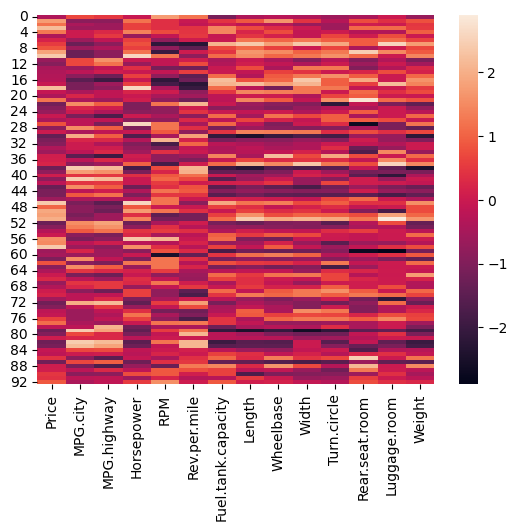

In [161]:
sns.heatmap(df4[['Price','MPG.city','MPG.highway','Horsepower','RPM','Rev.per.mile','Fuel.tank.capacity','Length','Wheelbase','Width','Turn.circle','Rear.seat.room','Luggage.room','Weight']])

In [162]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Type                        93 non-null     float64
 1   Price                       93 non-null     float64
 2   MPG.city                    93 non-null     float64
 3   MPG.highway                 93 non-null     float64
 4   AirBags                     93 non-null     int32  
 5   DriveTrain                  93 non-null     int32  
 6   Cylinders                   93 non-null     float64
 7   EngineSize                  93 non-null     float64
 8   Horsepower                  93 non-null     float64
 9   RPM                         93 non-null     float64
 10  Rev.per.mile                93 non-null     float64
 11  Man.trans.avail             93 non-null     int32  
 12  Fuel.tank.capacity          93 non-null     float64
 13  Passengers                  93 non-nu

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
x = df4.drop(['Price'],axis=1)

In [165]:
y = df4['Price']

In [166]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [167]:
from sklearn.preprocessing import PolynomialFeatures

In [168]:
pf = PolynomialFeatures(degree=1)

In [169]:
x_train_trans = pf.fit_transform(x_train)
x_test_trans= pf.fit_transform(x_test)

In [170]:
from sklearn.linear_model import LinearRegression

In [171]:
lr = LinearRegression()

In [172]:
lr.fit(x_train_trans , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [173]:
y_pred = lr.predict(x_test_trans)

In [174]:
from sklearn.metrics import r2_score,mean_absolute_error

In [175]:
r2_score(y_test,y_pred)

0.6373746536396092

In [176]:
mean_absolute_error(y_test,y_pred)

0.4712653583872964

In [177]:
residual = y_test - y_pred

In [178]:
import matplotlib.pyplot as plt

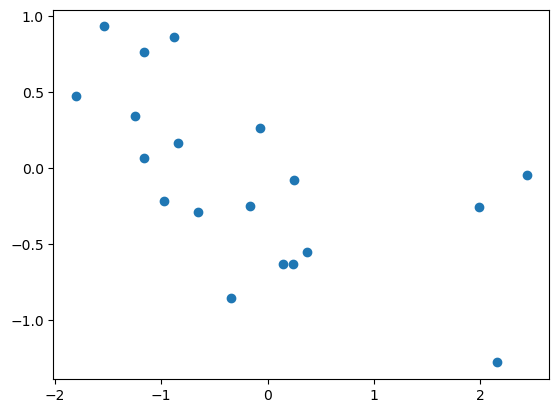

In [179]:
plt.scatter(y_pred,residual)